## Recommender System Notebook ##

The two most common types of recommender systems are Content-Based and Collaborative Filtering(CF)
> Collaborative filtering produces recommendations based on knowledge of user's attitude to items. Two sub categories:

    > Memory based
    > Model based

> Content based systems focus on the attributes of the items.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import re
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
from googletrans import Translator
trans = Translator()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meetd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
country_list = ["AU", "BR", "CA", "FR", "DE", "IN", "IT", "MX", "RU", "GB", "US"]
data = pd.DataFrame()
column_names = ['Publish-Time','Title','Description','Video-URL','Thumbnail',
                'Channel-Name','Localized-Title','Localized-Description',
                'Upload-Status','Privacy','License','Embeddable-Status',
                'Public-Stats','Made-For-Kids','View-Count','Likes','Dislikes',
                'Embed-HTML']
for country in country_list:
    temp_data = pd.read_csv('C:/Users/meetd/OneDrive/Desktop/Tech-Mahindra-ML/dataset/Cleaned_Data/'+country+'_data.csv',
                      names=column_names)
    temp_data = temp_data.drop(0)
    temp_data['Country'] = country
    data = data.append(temp_data)

In [3]:
data.head()

,Publish-Time,Title,Description,Video-URL,Thumbnail,Channel-Name,Localized-Title,Localized-Description,Upload-Status,Privacy,License,Embeddable-Status,Public-Stats,Made-For-Kids,View-Count,Likes,Dislikes,Embed-HTML,Country
1,2021-07-21T18:00:06Z,I FILLED MY ISLAND HOUSE WITH PACKING PEANUTS!,CHECK OUT CHASECRAFT on iOS :: https://apps.ap...,https://i.ytimg.com/vi/Y3sj_v62dpc/default.jpg,https://i.ytimg.com/vi/Y3sj_v62dpc/mqdefault.jpg,Unspeakable,I FILLED MY ISLAND HOUSE WITH PACKING PEANUTS!,CHECK OUT CHASECRAFT on iOS :: https://apps.ap...,processed,public,youtube,True,False,False,3945994,101089,3084,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
2,2021-07-21T21:41:14Z,"Best Sand Art Wins $5,000 Challenge! | ZHC Crafts",I can't believe we made art out of sand\nSubsc...,https://i.ytimg.com/vi/aVxHSHzm4kE/default.jpg,https://i.ytimg.com/vi/aVxHSHzm4kE/mqdefault.jpg,ZHC Crafts,"Best Sand Art Wins $5,000 Challenge! | ZHC Crafts",I can't believe we made art out of sand\nSubsc...,processed,public,youtube,True,True,False,2204582,89100,1375,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
3,2021-07-22T13:00:04Z,Dune | Official Main Trailer,IT’S TIME. #DuneMovie coming October 22.\n\n--...,https://i.ytimg.com/vi/8g18jFHCLXk/default.jpg,https://i.ytimg.com/vi/8g18jFHCLXk/mqdefault.jpg,Warner Bros. Pictures,Dune | Official Main Trailer,IT’S TIME. #DuneMovie coming October 22.\n\n--...,processed,public,youtube,True,False,False,3725450,145277,2302,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
4,2021-07-22T17:44:43Z,Battlefield 2042 | Battlefield Portal Official...,"Play Battlefield™ 2042 starting October 22, 20...",https://i.ytimg.com/vi/q4qWMcQfOCc/default.jpg,https://i.ytimg.com/vi/q4qWMcQfOCc/mqdefault.jpg,Battlefield,Battlefield 2042 | Battlefield Portal Official...,"Play Battlefield™ 2042 starting October 22, 20...",processed,public,youtube,True,False,False,1443476,154428,1905,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
5,2021-07-21T05:30:14Z,2nd ODI Highlights | Sri Lanka vs India 2021,2nd ODI Highlights | Sri Lanka vs India 2021\n...,https://i.ytimg.com/vi/8J7BoMdU-qw/default.jpg,https://i.ytimg.com/vi/8J7BoMdU-qw/mqdefault.jpg,Sri Lanka Cricket,2nd ODI Highlights | Sri Lanka vs India 2021,2nd ODI Highlights | Sri Lanka vs India 2021\n...,processed,public,youtube,True,True,False,12056482,296859,9993,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU


In [4]:
data = data.drop(['Publish-Time','Video-URL','Thumbnail','Localized-Title','Localized-Description',
                'Upload-Status','Privacy','License','Embeddable-Status',
                'Public-Stats','Made-For-Kids','Embed-HTML'] , axis=1)
data.head()

,Title,Description,Channel-Name,View-Count,Likes,Dislikes,Country
1,I FILLED MY ISLAND HOUSE WITH PACKING PEANUTS!,CHECK OUT CHASECRAFT on iOS :: https://apps.ap...,Unspeakable,3945994,101089,3084,AU
2,"Best Sand Art Wins $5,000 Challenge! | ZHC Crafts",I can't believe we made art out of sand\nSubsc...,ZHC Crafts,2204582,89100,1375,AU
3,Dune | Official Main Trailer,IT’S TIME. #DuneMovie coming October 22.\n\n--...,Warner Bros. Pictures,3725450,145277,2302,AU
4,Battlefield 2042 | Battlefield Portal Official...,"Play Battlefield™ 2042 starting October 22, 20...",Battlefield,1443476,154428,1905,AU
5,2nd ODI Highlights | Sri Lanka vs India 2021,2nd ODI Highlights | Sri Lanka vs India 2021\n...,Sri Lanka Cricket,12056482,296859,9993,AU


In [5]:
data['Title'] = data.apply(lambda row: nltk.word_tokenize(row["Title"]), axis=1)
data['Description'] = data.apply(lambda row: nltk.word_tokenize(row["Description"]), axis=1)

In [6]:
data.head()

,Title,Description,Channel-Name,View-Count,Likes,Dislikes,Country
1,"[I, FILLED, MY, ISLAND, HOUSE, WITH, PACKING, ...","[CHECK, OUT, CHASECRAFT, on, iOS, :, :, https,...",Unspeakable,3945994,101089,3084,AU
2,"[Best, Sand, Art, Wins, $, 5,000, Challenge, !...","[I, ca, n't, believe, we, made, art, out, of, ...",ZHC Crafts,2204582,89100,1375,AU
3,"[Dune, |, Official, Main, Trailer]","[IT, ’, S, TIME, ., #, DuneMovie, coming, Octo...",Warner Bros. Pictures,3725450,145277,2302,AU
4,"[Battlefield, 2042, |, Battlefield, Portal, Of...","[Play, Battlefield™, 2042, starting, October, ...",Battlefield,1443476,154428,1905,AU
5,"[2nd, ODI, Highlights, |, Sri, Lanka, vs, Indi...","[2nd, ODI, Highlights, |, Sri, Lanka, vs, Indi...",Sri Lanka Cricket,12056482,296859,9993,AU


In [7]:
title_word_2_count = {}
description_word_2_count = {}
pattern = r'[^a-z^A-Z]'
stop_words = set(stopwords.words('english'))
for dat in data['Title']:
    for word in dat:
        #word = trans.translate(word).text
        word = re.sub(pattern,'',word)
        word = ps.stem(word.lower())
        if(len(word)>2 and word not in stop_words):
            if word not in title_word_2_count.keys():
                title_word_2_count[word] = 1
            else:
                title_word_2_count[word] += 1
for dat in data['Description']:
    for word in dat:
        #word = trans.translate(word).text
        word = re.sub(pattern,'',word)
        word = ps.stem(word.lower())
        if(len(word)>2 and word not in stop_words):
            if word not in description_word_2_count.keys():
                description_word_2_count[word] = 1
            else:
                description_word_2_count[word] += 1

In [8]:
print('Length of different title words = ',len(title_word_2_count), "\n",'Length of different description words = ',len(description_word_2_count))

Length of different title words =  1713 
 Length of different description words =  13251


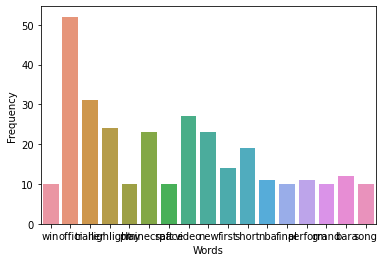

In [9]:
x = []
y = []
for wor in title_word_2_count:
    if title_word_2_count[wor] > 9:
        x.append(wor)
        y.append(title_word_2_count[wor])
sns.barplot(x = 'Words',
            y = 'Frequency',
            data = pd.DataFrame(list(zip(x,y)), columns =['Words', 'Frequency']))
plt.show()

In [10]:
title_exploded = data
title_exploded = title_exploded.drop(['Description', 'Channel-Name'], axis=1)
title_exploded = title_exploded.explode('Title',ignore_index=True)
for row in title_exploded.index:
    temp = title_exploded['Title'][row]
    temp = re.sub(pattern,'',temp)
    temp = ps.stem(temp.lower())
    if(len(temp)>2 and temp not in stop_words):
        title_exploded['Title'][row] = temp
    else:
        title_exploded['Title'][row] = None
title_exploded.dropna(how ='any',inplace=True)
title_exploded.head()

,Title,View-Count,Likes,Dislikes,Country
1,fill,3945994,101089,3084,AU
3,island,3945994,101089,3084,AU
4,hous,3945994,101089,3084,AU
6,pack,3945994,101089,3084,AU
7,peanut,3945994,101089,3084,AU


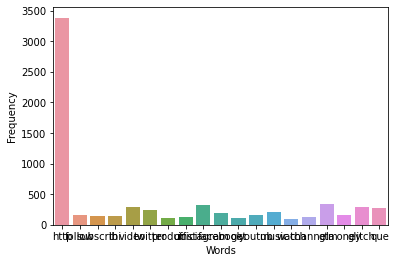

In [11]:
x = []
y = []
for wor in description_word_2_count:
    if description_word_2_count[wor] > 100:
        x.append(wor)
        y.append(description_word_2_count[wor])
sns.barplot(x = 'Words',
            y = 'Frequency',
            data = pd.DataFrame(list(zip(x,y)), columns =['Words', 'Frequency']))
plt.show()

In [12]:
desc_exploded = data
desc_exploded = desc_exploded.drop(['Title', 'Channel-Name'], axis=1)
desc_exploded = desc_exploded.explode('Description',ignore_index=True)
for row in desc_exploded.index:
    temp = desc_exploded['Description'][row]
    temp = re.sub(pattern,'',temp)
    temp = ps.stem(temp.lower())
    if(len(temp)>2 and temp not in stop_words):
        desc_exploded['Description'][row] = temp
    else:
        desc_exploded['Description'][row] = None
desc_exploded.dropna(how ='any',inplace=True)
desc_exploded.head()

,Description,View-Count,Likes,Dislikes,Country
0,check,3945994,101089,3084,AU
2,chasecraft,3945994,101089,3084,AU
7,http,3945994,101089,3084,AU
9,appsapplecomusappchasecraftepicrunninggameid,3945994,101089,3084,AU
11,android,3945994,101089,3084,AU


In [13]:
print(len(title_exploded),len(desc_exploded))

3145 46885


## Collaborative Filtering - Memory based using Cosine Similarity

### Item & User Collaborative Filtering ###
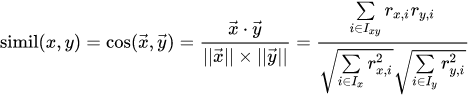

In [14]:
x = []
y = []
for wor in description_word_2_count:
    if description_word_2_count[wor] > 10:
        x.append(wor)
        y.append(description_word_2_count[wor])
train_test_description_data = pd.DataFrame(list(zip(x,y)), columns =['Words', 'Frequency'])

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(title_exploded, test_size = 0.2)

In [16]:
n_countries = title_exploded.Country.nunique()
n_keywords = title_exploded.Title.nunique()
print(n_countries, n_keywords)

11 1713


In [17]:
country_mapper = {}
keyword_mapper = {}
i = 0
for country in country_list:
    country_mapper[country] = i
    i += 1
print(i)
i = 0
for keyword in title_word_2_count:
    keyword_mapper[keyword] = i
    i += 1
print(i)
train_data_matrix = np.zeros((n_countries, n_keywords))
for line in train_data.itertuples():
    train_data_matrix[country_mapper[line[5]],keyword_mapper[line[1]]] = line[2]

test_data_matrix = np.zeros((n_countries, n_keywords))
for line in test_data.itertuples():
    test_data_matrix[country_mapper[line[5]],keyword_mapper[line[1]]] = line[2]

11
1713


In [18]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

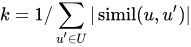
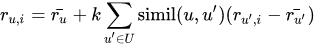

In [21]:
print("User similarity = ", user_similarity)
print("Item similarity = ", item_similarity)

User similarity =  [[0.         0.99178411 0.97955605 0.99143439 0.98592642 0.87973632
  0.98491616 0.95306771 0.98664042 0.82148755 0.88905427]
 [0.99178411 0.         0.98137388 0.98926779 0.99535606 0.99382607
  0.83263219 0.86132715 0.97545905 0.97127185 0.85905733]
 [0.97955605 0.98137388 0.         0.97569443 0.35836227 0.99190679
  0.9682253  0.96016835 0.98273056 0.58063853 0.8988672 ]
 [0.99143439 0.98926779 0.97569443 0.         0.95579715 0.96999396
  0.72020238 0.7371458  1.         0.90664478 0.86055904]
 [0.98592642 0.99535606 0.35836227 0.95579715 0.         0.98894331
  0.95637539 0.97045808 0.9377503  0.96898307 0.96908575]
 [0.87973632 0.99382607 0.99190679 0.96999396 0.98894331 0.
  0.9642492  0.87998458 1.         0.8599368  0.97760269]
 [0.98491616 0.83263219 0.9682253  0.72020238 0.95637539 0.9642492
  0.         0.71340853 0.93178761 0.89089817 0.81180194]
 [0.95306771 0.86132715 0.96016835 0.7371458  0.97045808 0.87998458
  0.71340853 0.         0.90139232 0.869

In [22]:
def predict(views, similarity, type='user'):
    if type == 'user':
        mean_user_views = views.mean(axis=1)
        views_diff = (views - mean_user_views[:, np.newaxis]) 
        pred = mean_user_views[:, np.newaxis]+similarity.dot(views_diff)/np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = views.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [23]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [24]:
print("User Prediction = ", user_prediction)
print("Item Prediction = ", item_prediction)

User Prediction =  [[1348063.60159875 1005531.81848728 1929579.17765381 ...  286527.45667939
   286527.45667939  226386.20194442]
 [1449050.27911746  629463.38868236 2106831.77036427 ...  -80739.59747777
   -80739.59747777 -138926.97635568]
 [1184920.39612702  475441.64304664 1899977.02015451 ...  133006.42948923
   133006.42948923   66693.15308644]
 ...
 [1397183.14296949  585795.57309554 2046110.8875491  ... -134902.88285113
  -134902.88285113 -196566.44496015]
 [1053861.13814453  682519.40386619 1670098.8133624  ...   92815.48601672
    92815.48601672   29445.84869725]
 [1122694.44475727  329516.44648984 1823861.97323208 ...  -77157.17115201
   -77157.17115201  -77157.17115201]]
Item Prediction =  [[201802.3357976  391402.35209312 244488.36269393 ... 394780.50762975
  394780.50762975 391634.50759346]
 [ 71532.50937143  68107.42532831  76766.14675358 ...  67139.5578605
   67139.5578605   66964.29380841]
 [118374.67930971 117567.48878377 160963.61735981 ... 227101.07487677
  227101.07

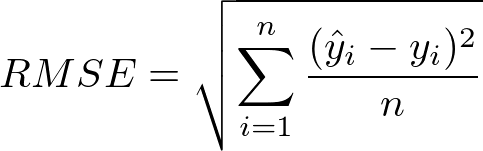

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [26]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 5963294.421020907
Item-based CF RMSE: 6128987.667633673
